In [262]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

 

cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

ad_df = pd.read_csv('D:\\Machine Learning\\Data sets\\Adult\\adult.data', names = cols, engine ='python', na_values="?", sep=r'\s*,\s*').dropna()


ad_df.head()

workclass = {'Private':1, 'Self-emp-not-inc':2, 'Self-emp-inc':3,'Federal-gov':4, 'Local-gov':5, 'State-gov':6, 'Without-pay':7, 'Never-worked':8}
education = {'Bachelors':1, 'Some-college':2, '11th':3, 'HS-grad':4, 'Prof-school':5, 'Assoc-acdm':6, 'Assoc-voc':7, '9th':8, '7th-8th':9, '12th':10, 'Masters':11, '1st-4th':12, '10th':13, 'Doctorate':14, '5th-6th':15, 'Preschool':16}

marital_status = {'Married-civ-spouse':1,
'Divorced':2,
'Never-married':3,
'Separated':4,
'Widowed':5,
'Married-spouse-absent':6,
'Married-AF-spouse':7}

occupation = {'Tech-support':1,
'Craft-repair':2,
'Other-service':3,
'Sales':4,
'Exec-managerial':5,
'Prof-specialty':6,
'Handlers-cleaners':7,
'Machine-op-inspct':8,
'Adm-clerical':9,
'Farming-fishing':10,
'Transport-moving':11,
'Priv-house-serv':12,
'Protective-serv':13,
'Armed-Forces':14}

relationship = {'Wife':1,
'Own-child':2,
'Husband':3,
'Not-in-family':4,
'Other-relative':5,
'Unmarried':6}

race = {'White':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4, 'Black':5}

sex = {'Female':1, 'Male':2}

native_country = {'United-States':1,
'Cambodia':2,
'England':3,
'Puerto-Rico':4,
'Canada':5,
'Germany':6,
'Outlying-US(Guam-USVI-etc)':7,
'India':8,
'Japan':9,
'Greece':10,
'South':11,
'China':12,
'Cuba':13,
'Iran':14,
'Honduras':15,
'Philippines':16,
'Italy':17,
'Poland':18,
'Jamaica':19,
'Vietnam':20,
'Mexico':21,
'Portugal':22,
'Ireland':23,
'France':24,
'Dominican-Republic':25,
'Laos':26,
'Ecuador':27,
'Taiwan':28,
'Haiti':29,
'Columbia':30,
'Hungary':31,
'Guatemala':32,
'Nicaragua':33,
'Scotland':34,
'Thailand':35,
'Yugoslavia':36,
'El-Salvador':37,
'Trinadad&Tobago':38,
'Peru':39,
'Hong':40,
'Holand-Netherlands':41}

income = {'<=50K':0,'>50K':1}

ad_df['workclass']=ad_df['workclass'].map(workclass)
ad_df['education']=ad_df['education'].map(education)

ad_df['marital-status']=ad_df['marital-status'].map(marital_status)
ad_df['occupation']=ad_df['occupation'].map(occupation)
ad_df['relationship']=ad_df['relationship'].map(relationship)
ad_df['race']=ad_df['race'].map(race)
ad_df['sex']=ad_df['sex'].map(sex)
ad_df['native-country']=ad_df['native-country'].map(native_country)
ad_df['income']=ad_df['income'].map(income)

ad_df.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,1,13,3,9,4,1,2,2174,0,40,1,0
1,50,2,83311,1,13,1,5,3,1,2,0,0,13,1,0
2,38,1,215646,4,9,2,7,4,1,2,0,0,40,1,0
3,53,1,234721,3,7,1,7,3,5,2,0,0,40,1,0
4,28,1,338409,1,13,1,6,1,5,1,0,0,40,13,0


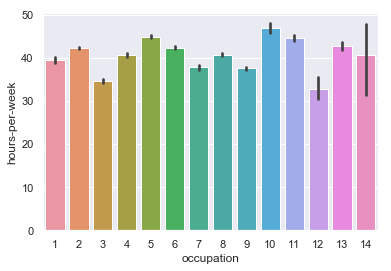

In [134]:
# occupation vs hours per week

sns.barplot(x=ad_df['occupation'],y = ad_df['hours-per-week'],data= ad_df)

plt.show()

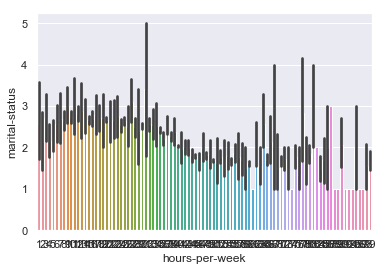

In [142]:
sns.barplot(x=ad_df['hours-per-week'],y = ad_df['marital-status'],data= ad_df)

plt.show()

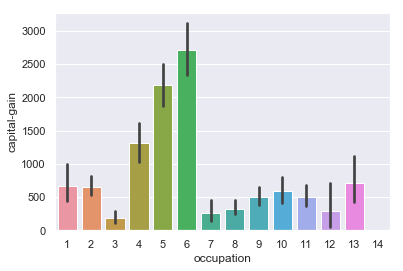

In [136]:
sns.barplot(ad_df['occupation'],ad_df['capital-gain'],data= ad_df)

plt.show()



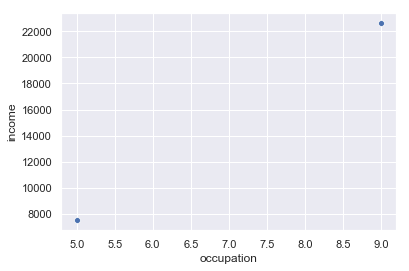

In [180]:
sns.scatterplot(ad_df['occupation'],ad_df['income'],data= ad_df)

plt.show()

In [213]:
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(ad_df[['occupation'],['eduction'],['marital-status'],['relationship'],['hours-per-week']],ad_df[['income']])

knn.predict([['2']])

k_range = list(range(1, 31))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

accuracy_score(ad_df[['income']],knn.predict(ad_df[['income']]))

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(ad_df[['income']],knn.predict(ad_df[['income']]))

#roc_auc_score(ad_df[['income']],knn.predict(ad_df[['income']]))



c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by usin

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [214]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 1}


In [261]:
knn = KNeighborsClassifier(n_neighbors =5)

knn.fit(ad_df[['occupation','education','marital-status','relationship','hours-per-week']],ad_df[['income']])
knn.predict([['2','3','2','2','40']])
print("Accuracy :",roc_auc_score(ad_df[['income']],knn.predict(ad_df[['occupation','education','marital-status','relationship','hours-per-week']])))

c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert 

Accuracy : 0.7433703217083437
